# Spaceship Preprocessing
Cleaning, data integration, reduction, and transformation for Spaceship Titanic dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset 

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- <b>PassengerId</b>: gggg_pp format, where gggg is a group and pp is the passenger number in the group.
- <b>HomePlanet</b>: their permanent residency planet.
- <b>CryoSleep</b>: whether or not they're being put to cryosleep during the voyage.
- <b>Cabin</b>: deck/num/side, with side can either be P (port) and S (starboard)
- <b>Destination</b>: their disembarking planet.
- <b>Age</b>: their age duh.
- <b>VIP</b>: whether or not they belong to the VIPs.
- <b>RoomService</b>: amount of money spent in room services.
- <b>FoodCourt</b>: amount of money spent in the food court.
- <b>ShoppingMall</b>: amount of money spent in the shopping mall.
- <b>Spa</b>: amount of money spent in spas.
- <b>VRDeck</b>: amount of money spent in VR decks.
- <b>Name</b>: name.
- <b>Transported</b>: yes/no, the 'target' column for prediction. 

In [4]:
# Looking for missing values or NaN
print("Train set missing values: ")
print(df.isna().sum())

Train set missing values: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [5]:
# Looking for duplicate entries
print(df.duplicated().sum())

0


In [6]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [7]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## Exploratory Data Analysis
1. Percentage of transported pax. 
2. Histogram of continuous features differentiated by Transported: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
3. Histogram of categorical features differentiated by Transported: HomePlanet, CryoSleep, Destination, VIP

Text(0.5, 1.0, 'Spaceship Titanic Pax Transported')

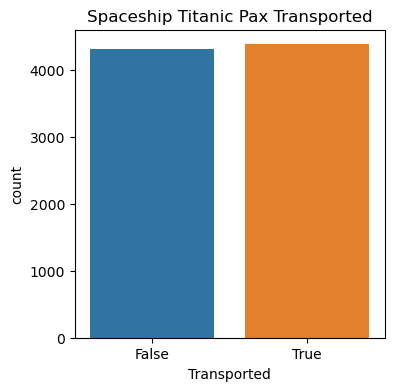

In [8]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="Transported")
plt.title("Spaceship Titanic Pax Transported")

Insight gained: 
- The passengers are proportionally split between transorted or not.

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Spaceship Titanic Pax Age Distribution')

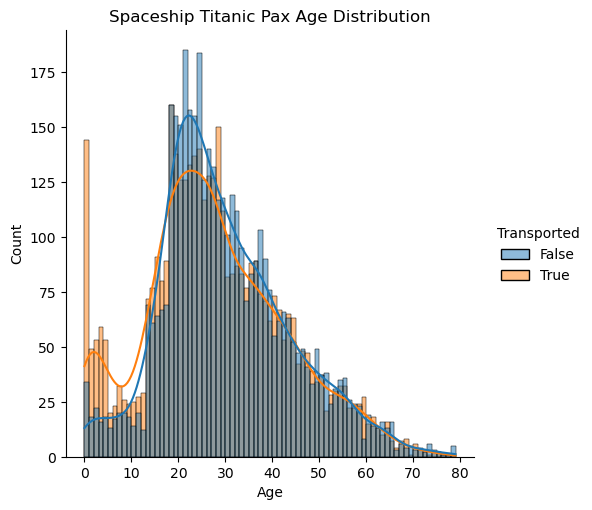

In [9]:
sns.displot(data=df, x="Age", hue="Transported", kde=True, binwidth=1)
plt.title("Spaceship Titanic Pax Age Distribution")

Insight:
- A person of age 0-18 is most likely to be transported.
- A person of age 18-25 is less likely to be transported.
- A person of age older than 25 is equally likely to be transported than not.

To-do:
- Create a categorical values that separate between age groups: child, teen, adult.

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

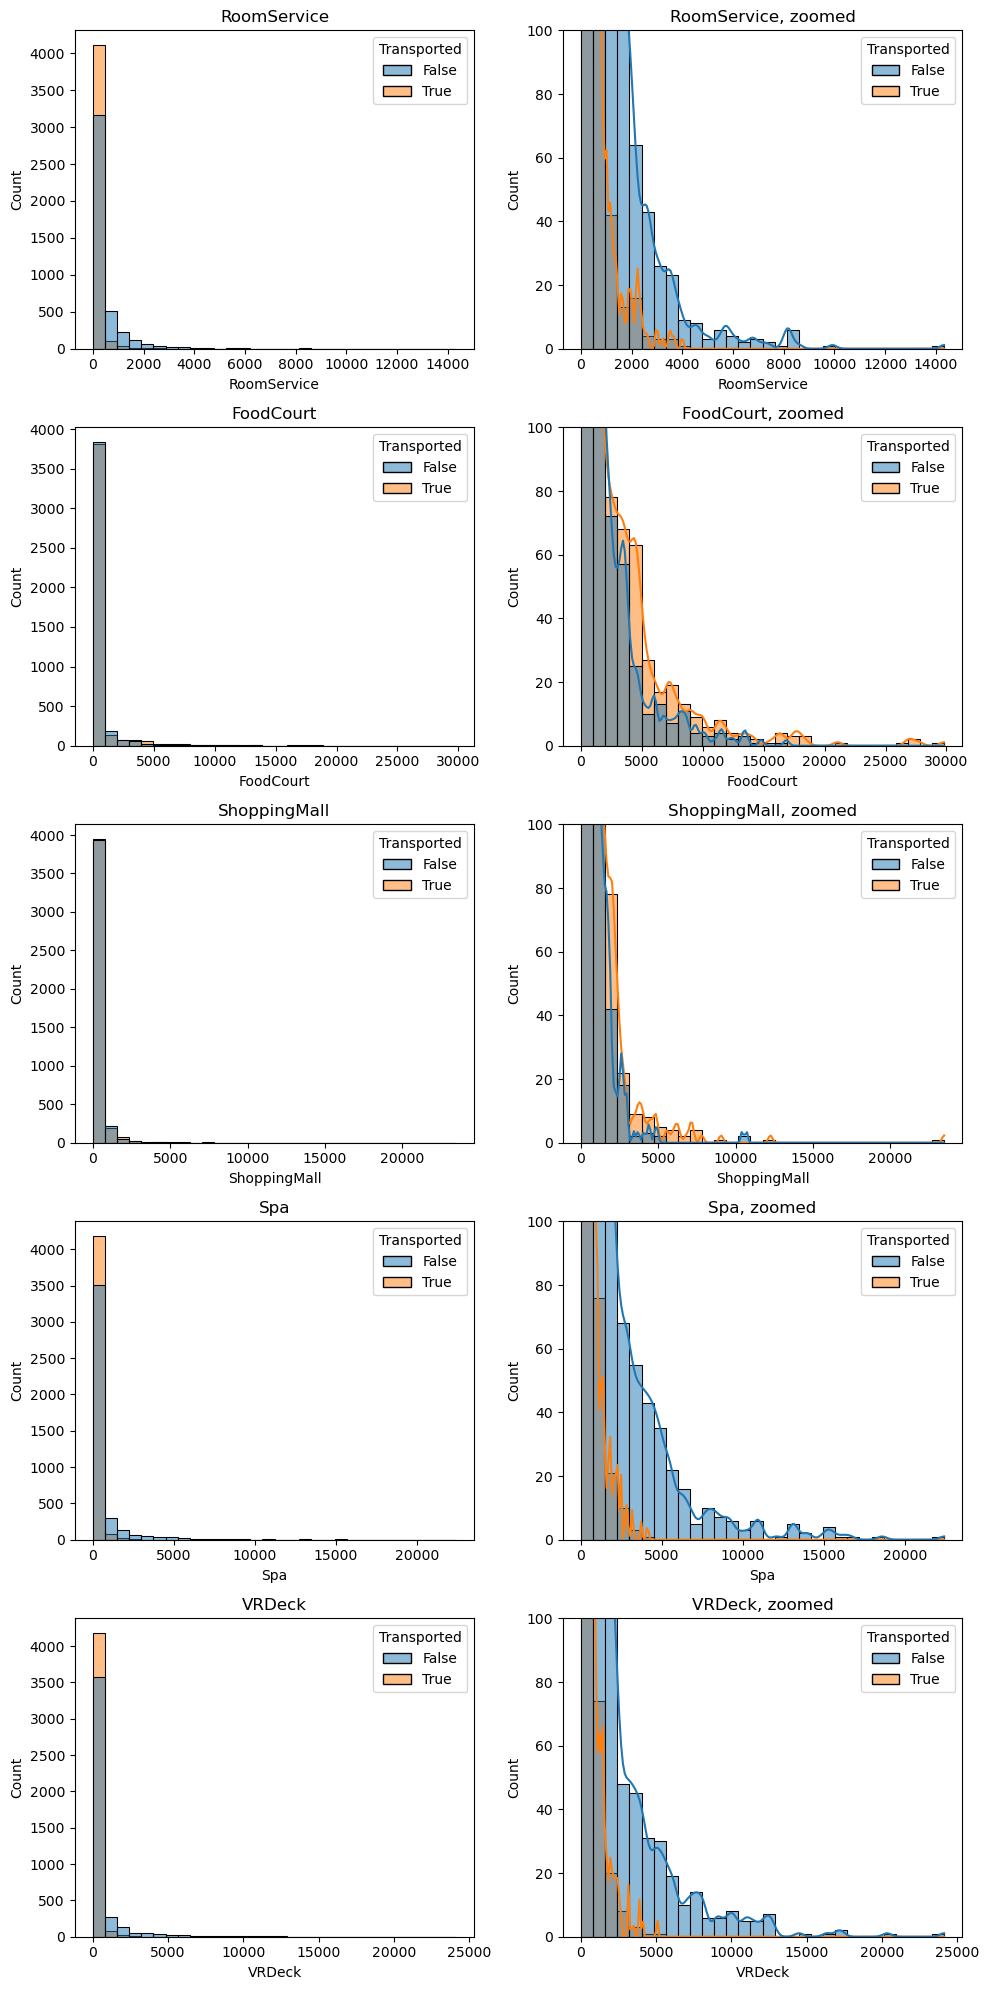

In [10]:
# Expenditure features visualization

fig = plt.figure(figsize=(10, 20))
exp_feats = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for i, feature in enumerate(exp_feats):
    # Left plot (full-view)
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.histplot(data=df, x=feature, bins=30, hue="Transported", kde=False, axes=ax)
    ax.set_title(feature)

    # Right plot (zoomed, max 'y' of 100)
    ax = fig.add_subplot(5, 2, 2*i+2)
    sns.histplot(data=df, x=feature, bins=30, hue="Transported", kde=True, axes=ax)
    plt.ylim([0, 100])
    ax.set_title("{}, zoomed".format(feature))

fig.tight_layout()
plt.show()

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


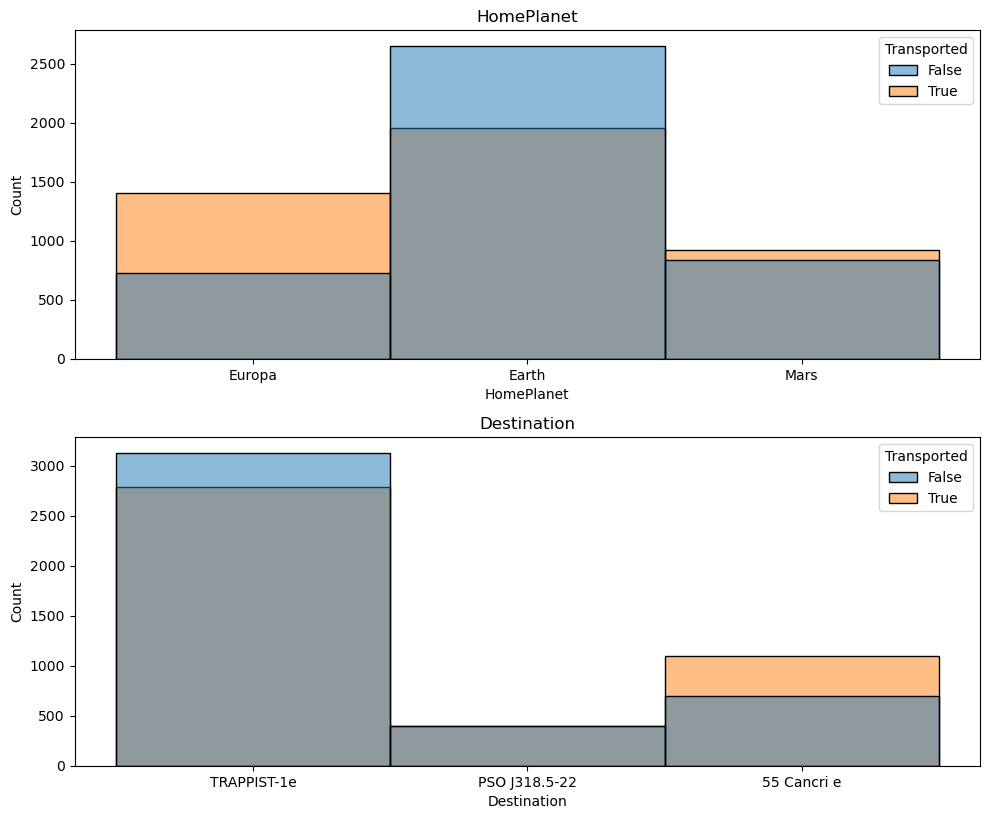

In [11]:
# Categorical features visualization (part 1: 'HomePlanet' and 'Destination')
cat_feats=['HomePlanet', 'Destination']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, feature in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.histplot(data=df, x=feature, axes=ax, hue='Transported')
    ax.set_title(feature)

fig.tight_layout()  
plt.show()

In [12]:
# Categorical features visualization (part 2: 'CryoSleep' and 'VIP')
cryo_transported = df.loc[(df['CryoSleep'] == True) & (df['Transported'] == True), 'Transported'].count()
cryo_stays = df.loc[(df['CryoSleep'] == True) & (df['Transported'] == False), 'Transported'].count()
vip_transported = df.loc[(df['VIP'] == True) & (df['Transported'] == True), 'Transported'].count()
vip_stays = df.loc[(df['VIP'] == True) & (df['Transported'] == False), 'Transported'].count()

print(cryo_transported, cryo_stays, vip_transported, vip_stays)

2483 554 76 123


Text(0.5, 1.0, 'CryoSleep and VIP Pax Distribution')

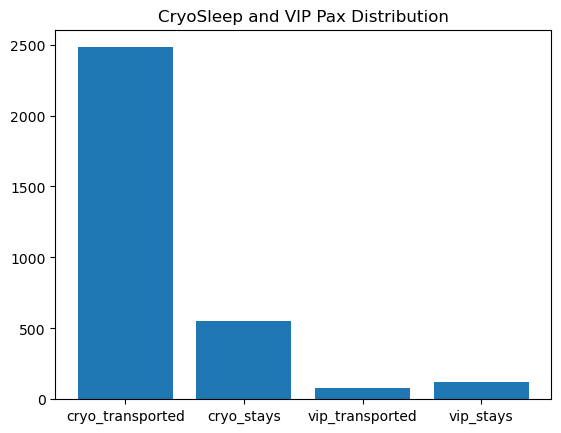

In [13]:
cat_feats_2_dict = {
    'categories' : ['cryo_transported', 'cryo_stays', 'vip_transported', 'vip_stays'],
    'counts' : [cryo_transported, cryo_stays, vip_transported, vip_stays]
}
plt.bar(
    data=cat_feats_2_dict,
    x='categories',
    height='counts')
plt.title("CryoSleep and VIP Pax Distribution")

Insights:
- Passenger who went into CryoSleep is most likely to be transported.
- Passenger who is a VIP is most likely not to be transported.

In [14]:
# Qualitative feats
qual_feats = ['PassengerId', 'Cabin', 'Name']
df[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


Qualitative insights:
- Extract deck, num, side from the cabin feature
- Extract group and group size from the PassengerId feature
- Extract surname from the Name feature to identify families

# Feature Engineering 
"Better features make better models."

### Age Status
- Age_0-18: most likely transported.
- Age_19-35: most likely not transported.
- Age_36-50: equally likely.
- Age_51+: equally likely.

In [15]:
df['AgeGroup'] = np.nan
df.loc[df['Age'] <= 18, 'AgeGroup'] = 'Age_0-18'
df.loc[(df['Age'] > 18) & (df['Age'] <= 35), 'AgeGroup'] = 'Age_19-35'
df.loc[(df['Age'] > 35) & (df['Age'] <=50), 'AgeGroup'] = 'Age_36-50' 
df.loc[df['Age'] > 50, 'AgeGroup'] = 'Age_51+'

C:\Users\RAYHAN EGAR\AppData\Local\Temp\ipykernel_10972\3953240023.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Age_0-18' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age'] <= 18, 'AgeGroup'] = 'Age_0-18'


c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Spaceship Titanic Pax Age Group')

<Figure size 1000x400 with 0 Axes>

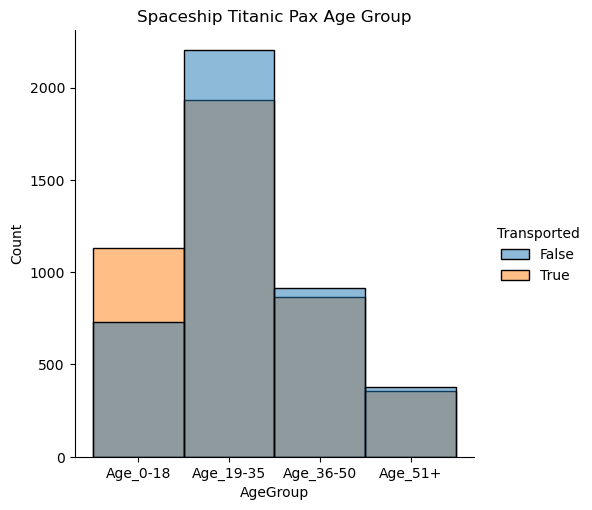

In [16]:
# Age group visualization
plt.figure(figsize=(10, 4))
sns.displot(
    data=df.sort_values(by='AgeGroup'),
    x='AgeGroup',
    hue='Transported'
)
plt.title('Spaceship Titanic Pax Age Group')

### Expenditure
- Calculate total expenditure, and
- Identify paxes with 0 expense

In [17]:
df['Expenditure'] = df[exp_feats].sum(axis=1)
df['NoSpending'] = (df['Expenditure']==0).astype(int)

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

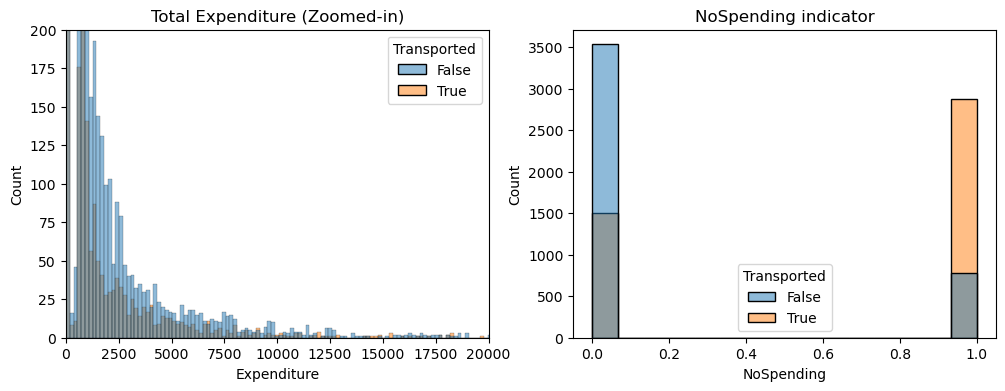

In [18]:
# Expenditure and NoSpending visualization
fig = plt.figure(figsize=(12, 4))

# Plot expenditure (zoomed-in)
plt.subplot(1, 2, 1)
sns.histplot(data=df,
            x='Expenditure',
            hue='Transported',
            bins=200)
plt.title("Total Expenditure (Zoomed-in)")
plt.ylim([0, 200])
plt.xlim([0, 20000])

# Plot NoSpending 
plt.subplot(1, 2, 2)
sns.histplot(
    data=df,
    x='NoSpending',
    hue='Transported'
)
plt.title("NoSpending indicator")

plt.tight_layout

Insights:
- Passengers, please spend your money.
- The more you spend, the better.

### Passenger Group
Extracting passenger group and group size based on PassengerId
- 'gggg' indicates the group
- '_' is used as delim.

In [19]:
# Extracting Group from PassengerId using lambda function
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [20]:
# Count each group frequency, store it in a dict
group_sizes = df['Group'].value_counts().to_dict()

# Fill each record with its respective group_sizes
df['GroupSize'] = df['Group'].apply(lambda x : group_sizes.get(x, 0))

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'GroupSize distribution')

<Figure size 1000x400 with 0 Axes>

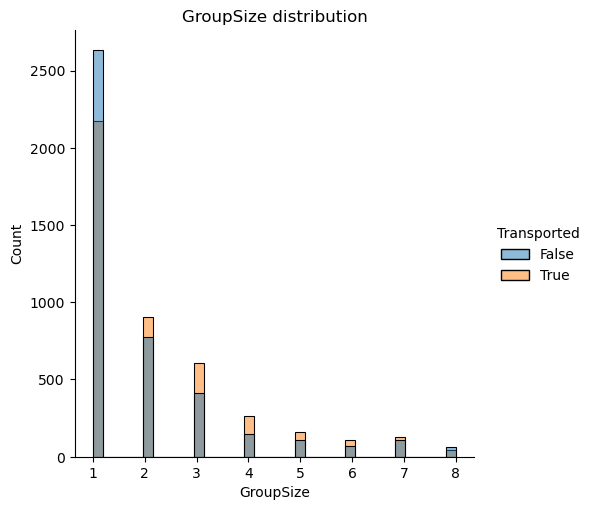

In [21]:
plt.figure(figsize=(10,4))
sns.displot(
    data=df,
    x='GroupSize',
    hue='Transported'
)
plt.title("GroupSize distribution")

Insights:
- Group with size one is less likely to be transported.
- Data can be compressed further: 'Solo' feature.

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Solo passenger distribution'}, xlabel='Solo', ylabel='Count'>

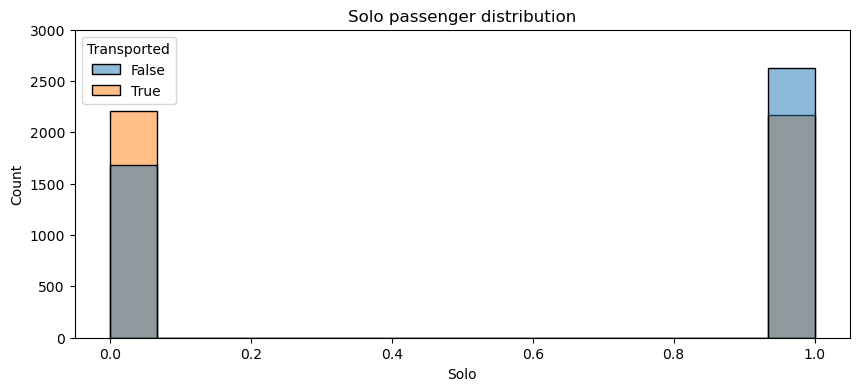

In [23]:
df['Solo'] = (df['GroupSize']==1).astype(int)

# Solo visualization
plt.figure(figsize=(10,4))
plt.title("Solo passenger distribution")
plt.ylim([0, 3000])
sns.histplot(
    data=df,
    x='Solo',
    hue='Transported'
)

### Cabin location

Format: deck/num/side
- Extract deck
- Extract num
- Extract side

Cabin number is unique regardless of its deck, e.g. there's no such case where F/10 and G/10 are present at the same time.

In [24]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,Expenditure,NoSpending,Group,GroupSize,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_36-50,0.0,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_19-35,736.0,0,2,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_51+,10383.0,0,3,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Age_19-35,5176.0,0,3,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Age_0-18,1091.0,0,4,1,1


In [25]:
# Fill NaN with outliers for feature extraction purpose.
df['Cabin'].fillna('Z/9999/Z', inplace=True)

# Split cabin, delimiter of '/'
df['CabinDeck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
df['CabinNum'] = df['Cabin'].apply(lambda x: x.split('/')[1])
df['CabinSide'] = df['Cabin'].apply(lambda x: x.split('/')[2])

# Put NaN back
df.loc[df['CabinDeck']=='Z', 'CabinDeck'] = np.nan
df.loc[df['CabinNum']=='9999', 'CabinNum'] = np.nan
df.loc[df['CabinSide']=='Z', 'CabinSide'] = np.nan

In [30]:
df['CabinNum'].fillna('9999', inplace=True)
df['CabinNum'] = df['CabinNum'].astype(int)
df.loc[df['CabinNum']==9999, 'CabinNum'] = np.nan
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,AgeGroup,Expenditure,NoSpending,Group,GroupSize,Solo,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,False,Age_36-50,0.0,1,1,1,1,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,True,Age_19-35,736.0,0,2,1,1,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,False,Age_51+,10383.0,0,3,2,0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,False,Age_19-35,5176.0,0,3,2,0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,True,Age_0-18,1091.0,0,4,1,1,F,1.0,S


In [28]:
# Checks for how many unique values of CabinDeck are there
df['CabinDeck'].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


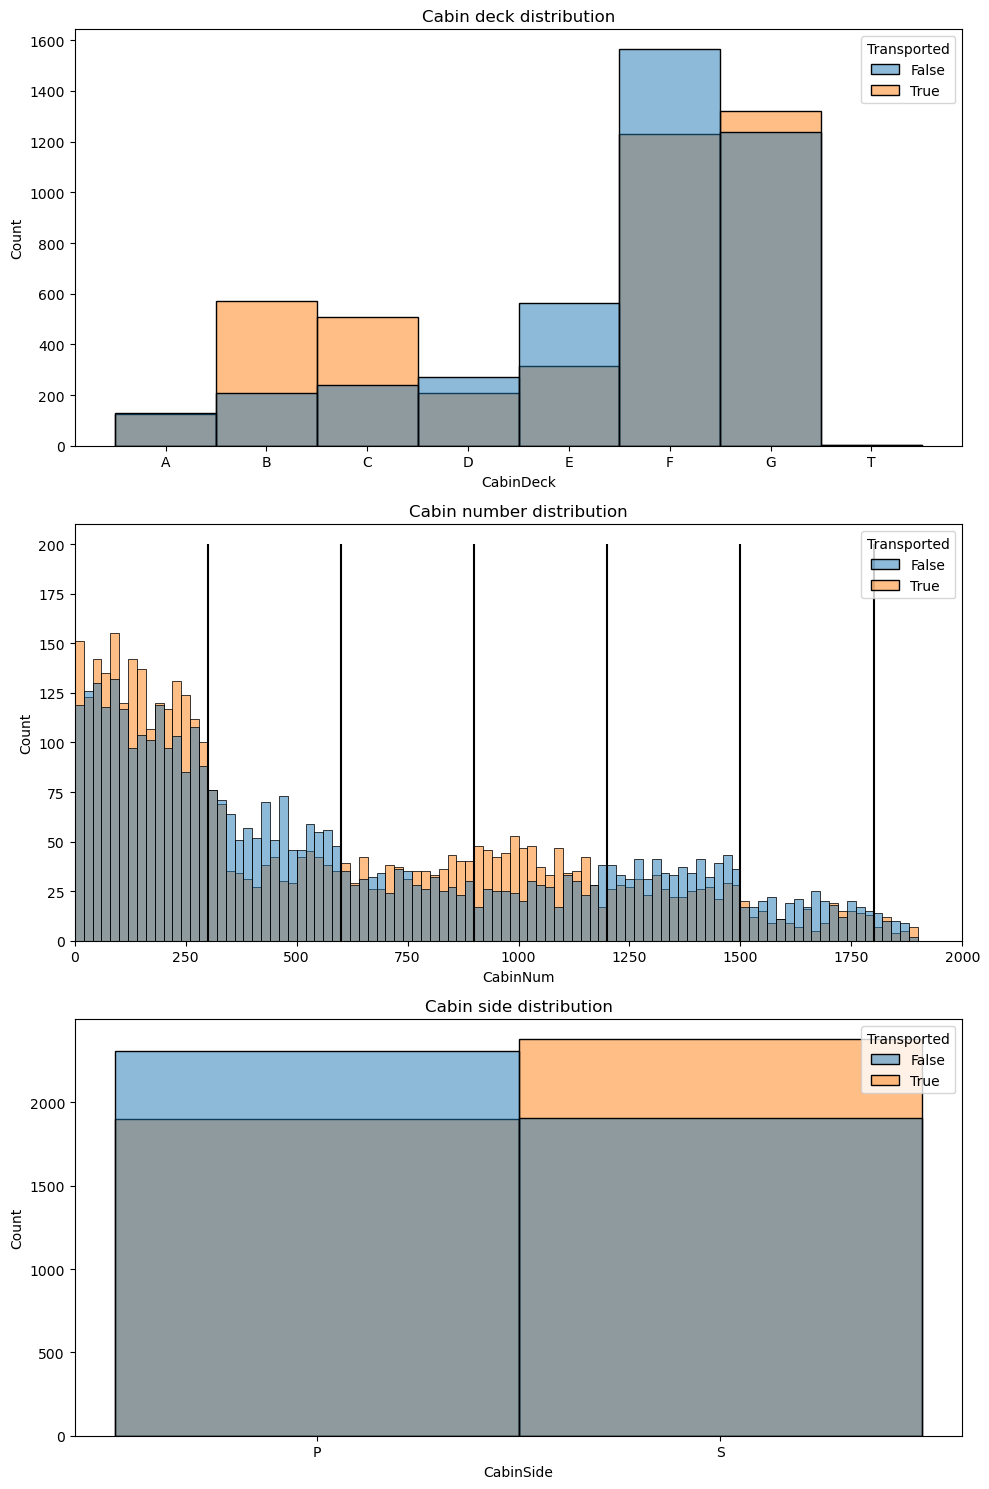

In [32]:
# Plot CabinDeck distribution
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
sns.histplot(data=df.sort_values(by='CabinDeck'),
             x='CabinDeck',
             hue='Transported')
plt.title("Cabin deck distribution")

# Plot CabinNum distribution
plt.subplot(3, 1, 2)
sns.histplot(data=df,
             x='CabinNum',
             hue='Transported',
             binwidth=20)

# Ffs I haven't figured the real reason as to why they did the grouping of CabinNum every 300
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.xlim([0, 2000])
plt.title("Cabin number distribution")

# Plot CabinSide distribution
plt.subplot(3, 1, 3)
sns.histplot(data=df.sort_values(by='CabinSide'),
             x='CabinSide',
             hue='Transported')
plt.title("Cabin side distribution")

plt.tight_layout()


### Feature Discritization: CabinRegion

From the above fig:
- Paxes in CabinDeck B, C, G are most likely to be transported.
- Paxes in CabinDeck D, E, F are most likely not to be transported.
- Paxes in CabinDeck A are equally likely to be transported than not.
- CabinNum are being grouped into chunks of size 300. This can be used to create a discritization, forming a new feature called CabinRegion.
- Another option is to do a one-hot encoding by creating 7 new features (CabinRegion_1 - CabinRegion_7).

In [33]:
# One-Hot encoding
df['CabinRegion_1'] = (df['CabinNum'] < 300).astype(int)
df['CabinRegion_2'] = ((df['CabinNum'] >= 300) & (df['CabinNum'] < 600)).astype(int)
df['CabinRegion_3'] = ((df['CabinNum'] >= 600) & (df['CabinNum'] < 900)).astype(int)
df['CabinRegion_4'] = ((df['CabinNum'] >= 900) & (df['CabinNum'] < 1200)).astype(int)
df['CabinRegion_5'] = ((df['CabinNum'] >= 1200) & (df['CabinNum'] < 1500)).astype(int)
df['CabinRegion_6'] = ((df['CabinNum'] >= 1500) & (df['CabinNum'] < 1800)).astype(int)
df['CabinRegion_7'] = (df['CabinNum'] >= 1800).astype(int)

# Label encoding
df['CabinRegion'] = np.nan
df.loc[df['CabinRegion_1']==1, 'CabinRegion'] = 1
df.loc[df['CabinRegion_2']==1, 'CabinRegion'] = 2
df.loc[df['CabinRegion_3']==1, 'CabinRegion'] = 3
df.loc[df['CabinRegion_4']==1, 'CabinRegion'] = 4
df.loc[df['CabinRegion_5']==1, 'CabinRegion'] = 5
df.loc[df['CabinRegion_6']==1, 'CabinRegion'] = 6
df.loc[df['CabinRegion_7']==1, 'CabinRegion'] = 7

df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,CabinNum,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0.0,P,1,0,0,0,0,0,0,1.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0.0,S,1,0,0,0,0,0,0,1.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0.0,S,1,0,0,0,0,0,0,1.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0.0,S,1,0,0,0,0,0,0,1.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,1.0,S,1,0,0,0,0,0,0,1.0


c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Cabin region distribution')

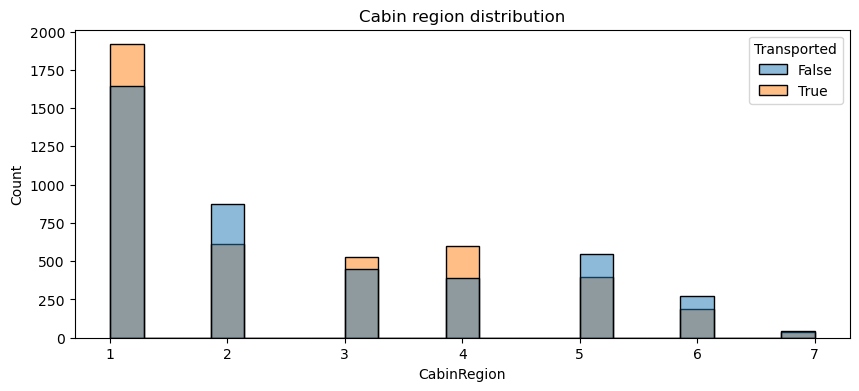

In [34]:
# CabinRegion visualization
plt.figure(figsize=(10, 4))
sns.histplot(
    data=df.sort_values(by='CabinRegion'),
    x='CabinRegion',
    hue='Transported'
)
plt.title('Cabin region distribution')

## Family size calculation

Extracted from feature 'Name', use delimiter ' '.
- Create new feature 'Surname'
- Create new feature 'FamilySize'

In [35]:
df['Name'].fillna('Unknown Unknown', inplace=True)

# Surname extraction
df['Surname'] = df['Name'].apply(lambda x: x.split(' ')[-1])

In [36]:
# Count surname, store it in a dictionary
surname_dict = df['Surname'].value_counts().to_dict()
df['FamilySize'] = df['Surname'].apply(lambda x: surname_dict.get(x))

# Put NaN back
df.loc[df['Surname']=='Unknown', 'FamilySize'] = np.nan
df.loc[df['Surname']=='Unknown', 'Surname'] = np.nan

# Drop Name cs we don't need it
df.drop('Name', axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,Surname,FamilySize
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1.0,Ofracculy,1.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,1,0,0,0,0,0,0,1.0,Vines,4.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,1,0,0,0,0,0,0,1.0,Susent,6.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,1,0,0,0,0,0,0,1.0,Susent,6.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,1,0,0,0,0,0,0,1.0,Santantines,6.0


c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'FamilySize distribution')

<Figure size 1000x400 with 0 Axes>

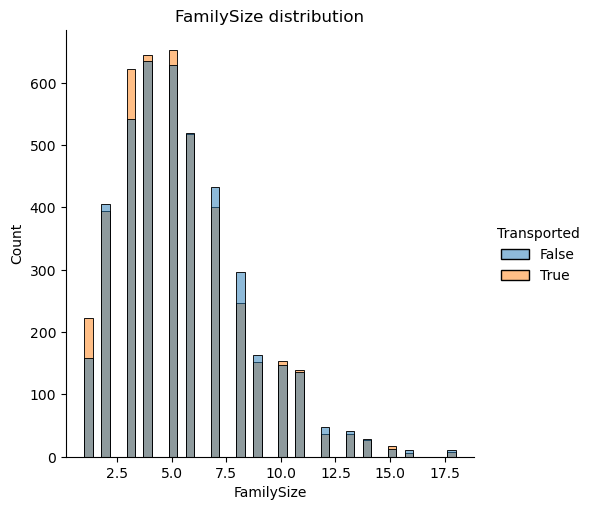

In [37]:
# FamilySize visualization
plt.figure(figsize=(10, 4))
sns.displot(
    data=df.sort_values(by='FamilySize'),
    x='FamilySize',
    hue='Transported'
)
plt.title('FamilySize distribution')

## Missing Values

In [38]:
# Columns with missing values
nan_feats = df.columns[df.isna().any()].tolist()

# Create summary
nan_feats_summary = pd.DataFrame(df[nan_feats].isna().sum(), columns=['NumberMissing'])
nan_feats_summary['PercentMissing'] = np.round(100 * nan_feats_summary['NumberMissing']/len(df), 2)
nan_feats_summary.sort_values(by='NumberMissing', ascending=False)

,NumberMissing,PercentMissing
CryoSleep,217,2.50
ShoppingMall,208,2.39
VIP,203,2.34
HomePlanet,201,2.31
Surname,200,2.30
FamilySize,200,2.30
CabinDeck,199,2.29
CabinNum,199,2.29
CabinSide,199,2.29
CabinRegion,199,2.29


Text(0.5, 1.0, 'Heatmap of missing values')

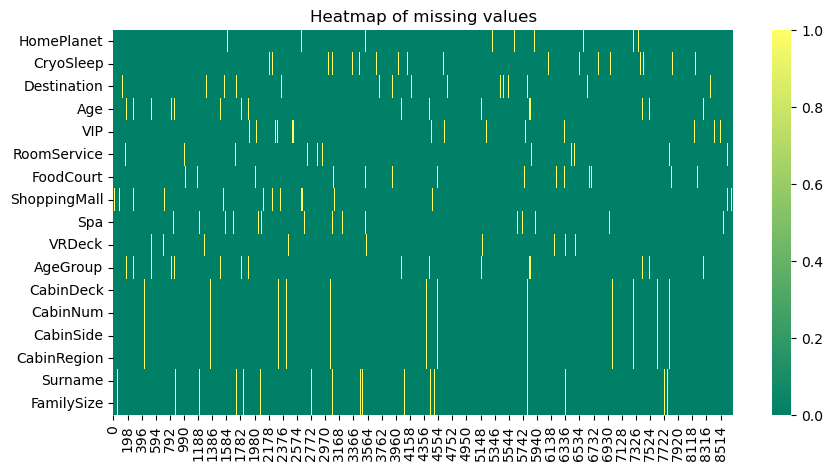

In [42]:
# Missing values heatmap to see feature isolation
plt.figure(figsize=(10, 5))
sns.heatmap(df[nan_feats].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Insight: 
- On average, NaN composes only 2% of the total records, but most of the NaN are isolated.
- Dropping rows with NaN causes a big loss.

Try to:
- Find correlation between HomePlanet with Group, Destination, Surname, Deck

### HomePlanet and Group

In [43]:
# Joint distribution of Group and HomePlanet
GHP_gb = df.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


Insight: 
- Each Group belong only to one HomePlanet.
- Fill missing HomePlanet values with its respective group's HomePlanet

In [50]:
# Missing values before
HP_bef=df['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=df[df['HomePlanet'].isna()][(df[df['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
df.loc[GHP_index,'HomePlanet']=df.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111


### HomePlanet and CabinDeck

<Axes: xlabel='CabinDeck', ylabel='HomePlanet'>

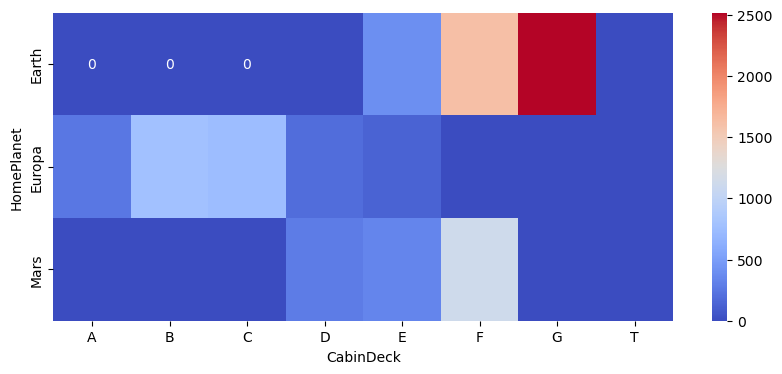

In [54]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb = df.groupby(['CabinDeck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10, 4))
sns.heatmap(
    data=CDHP_gb.T,
    fmt='g',
    cmap='coolwarm',
    annot=True
)